# PRACTICE 1: ADVANCED MEDICAL IMAGE PRE-PROCESSING METHODS

##### MEDICAL IMAGE ANALYSIS
##### Degree in Biomedical Engineering
##### Course 2020/2021


<div class="alert alert-block alert-warning">
<b>Authors:</b> $$Raúl \quad López \quad González$$ <br>
$$Hugo \quad Calero \quad Diaz$$ <br>
$$Pablo \quad Laso \quad Mielgo$$

</div>

---
### PREVIOUS ISSUES AND NOISE ADDITION 
#### Algorithm for evaluating the results obtained with noisy images

For different types of noise:
* White.
* Gaussian.
* Impulsive (salt-and-pepper).

For different levels of intensity.

In [1]:
import HRLsoftware as HRL # File where are all functions saved

# Modules required . . .
from skimage import io
import numpy as np
%pylab inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from tqdm import tqdm
import winsound
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter
import scipy.ndimage.filters as filters
from skimage.filters import sobel
import imageio
import acoustics
import random
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [2]:
img='vhuman_T1.png'   

### Impulsive noise

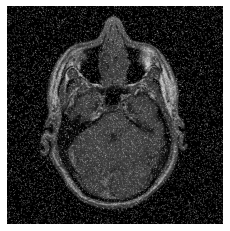

In [3]:
impulsive_noise1 = HRL.impulsive_noise(img,0.05)
HRL.show_images('impulsive_output.png', impulsive_noise1)
plt.savefig('impulsive_output_gs.png', bbox_inches='tight', pad_inches = 0)

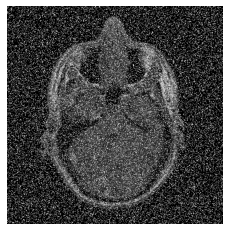

In [4]:
impulsive_noise2 = HRL.impulsive_noise(img,0.15)
HRL.show_images('impulsive_output_2.png', impulsive_noise2)
plt.savefig('impulsive_output_2_gs.png', bbox_inches='tight', pad_inches = 0)

### Gaussian noise

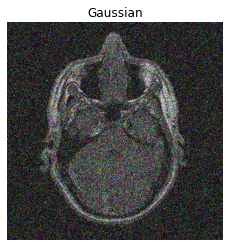

In [5]:
g_image1 = HRL.gnoise(img,0,10,30)
HRL.show_images('gaussian_output_1.png', g_image1)
img1 = Image.open('gaussian_output_1.png').convert('LA')
img1.save('gaussian_output_1_gs.png')

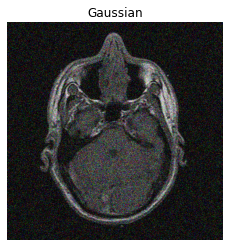

In [6]:
g_image2 = HRL.gnoise(img,0,10,15)
HRL.show_images('gaussian_output_2.png', g_image2)
img2 = Image.open('gaussian_output_2.png').convert('LA')
img2.save('gaussian_output_2_gs.png')

### White noise

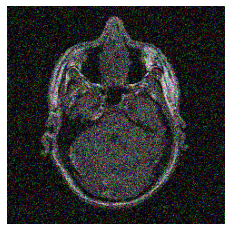

In [7]:
white_noise2 = HRL.white_noise(img,50)
HRL.show_images('white_output_2.png', white_noise2)
img4 = Image.open('white_output_2.png').convert('LA')
img4.save('white_output_2_gs.png')

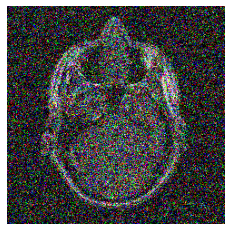

In [8]:
white_noise1 = HRL.white_noise(img,100)
HRL.show_images('white_output_1.png', white_noise1)
img3 = Image.open('white_output_1.png').convert('LA')
img3.save('white_output_gs.png')

---
## Algorithm: NON-LOCAL MEANS FILTERING

### Hypothesis

**Non-local means (NLM)** is an algorithm in image processing for image denoising. It mainly arises from the idea that finding the mean taking into account pixels in neighboring areas, albeit initially meant for denoising, can actually lead to blurring and spatial resolution lose in high-gradient areas, that is, areas int he image with high frequency, which may correspond to noise, but also, edges. 

NLM overcomes this issue by taking into acocount all pixels in the image, at the cost of increasing computational speed, but yields better results when it comes to denoising without blurring edges. 

Mathematically, NLM computes the average of all the pixels, each weigthed on a parameter that depedends upon similarity between the pixel being filtered and the pixel (one at a time) being analyzed.  It is important to highlight newly that the analyzed pixels are not only neightbours, but pixels belonging to any point in the image. Hence, we can formulate mathematically this hypothesis as: 

$$ NL [v] (i) = \sum_{j ∈ I}{} w(i, j) \cdot v(j), $$

where  $v(i)$ is the pixel being filtered and $v(j)$ the one being analyzed (for comparison). The weight $w(i,j)$ is the parameter that will determine how similar those two pixels are, and can belong to any point in the image (unless a serach radius is specified). This parameter $w(i,j)$ is computed as:
$$w(i, j) = \frac{1}{Z(i)} \cdot e^{-\frac{d(i,j)}{h^2}} ,$$
where $h^2$ is a similarity parameter to specify the degree of filtering to be used, $Z(i)$ is just for normalizing, defined as $\sum_{∀j}{e^{-\frac{d(i,j)}{h2}}} $, that is, all the values for the weight $w(i,j)$, and $d(i,j)% the Euclidian distance between the two pixels being compared. It can be defined as:

$$ d(i, j) = \sqrt{\sum_{i=1}^{n} (p_i − q_i )^2} ,$$ if we are comapring the gray values of each pixel; or rather:

$$ d(i, j) = || v(N_i ) − v(N_j )||^2_{R_{sim}} ,$$

if we are comapring the gray values of each of the patches.

Thus, we have a function that returns a normalized value, and behaves as a negative exponential, in other words, that is a function that tends to zero more abruptly if the exponent is increased (larger distance between the two pixels being compared / lower degree of filtering). 

estimated noise standard deviation = 0.06604209388805798


(Text(0.5, 1.0, 'Filtered image'), (-0.5, 49.5, 49.5, -0.5))

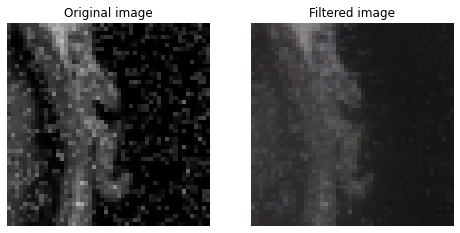

In [9]:
image_in='impulsive_output_gs.png'                                   # Python implementation of NLM filter
img = mpimg.imread(image_in)
astro = img
astro = astro[100:150, 150:200]  # (acceptable size >> meaningful results + less computation time)

sigma = 0.08
noisy = random_noise(astro, var=sigma**2)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, multichannel=True))
print(f"estimated noise standard deviation = {sigma_est}")

patch_kw = dict(patch_size=3,      # 5x5 patches
                patch_distance=10,  # 13x13 search area
                multichannel=True)

# slow algorithm
denoise = denoise_nl_means(noisy, h=3 * sigma_est, fast_mode=False,**patch_kw)

plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.imshow(img[100:150, 150:200] , cmap = 'gray')
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(denoise, cmap=plt.cm.gray)
plt.title('Filtered image'), plt.axis('off')

# NLM parameter evaluation

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [06:27<00:00,  7.76s/it]


Process ended succesfully.


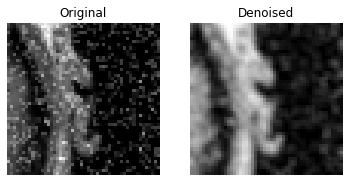

In [10]:
image_in='impulsive_output_gs.png'
img_in = mpimg.imread(image_in)
image=img_in[100:150, 150:200,0]  
pad_width=1
h=1
denoised_image = HRL.NL_Means(image, pad_width,h)

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [04:37<00:00,  5.56s/it]


Process ended succesfully.


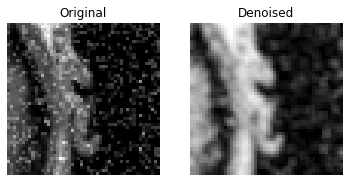

In [11]:
pad_width=1
h=5
denoised_image = HRL.NL_Means(image, pad_width,h)

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [04:32<00:00,  5.45s/it]


Process ended succesfully.


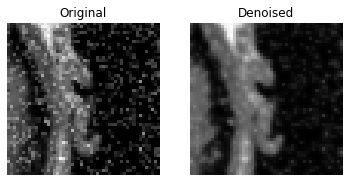

In [12]:
pad_width=1
h=0.25
denoised_image = HRL.NL_Means(image, pad_width,h)

For this image, where we apply NLM filter, the ideal parameters would be a pad with of 1 (patch 3x3) and a value of 0.25 in h. The value h, will affect the weight because with greater values, euclidean distance will be of less importance and viceversa. In the last case, we can see how this low value affects the image. Due to closer values gaining more importance, intensities over the values of the object and the background are mantained.

# NLM CPP theory
To avoid excessive smoothing of these bright spots, we can weight the
original weights w(i, j) of the NLM so that they also depend on the
similarity between central pixels, which is called NLM-CPP:


$$ w(i, j)^{CPP} = η(i, j)w(i, j), i \ne j, $$
where
$$ η(i, j) =  \frac {1}{{1 + [|v(i) − v(j)|/D_0]}^{2\cdot \alpha}} , $$


The parameter $ \alpha $ will intensify the parameter $ η $ (with a bigger $ \alpha $ small values of mu will be even smaller and viceversa). $ η $  is regulated by the distance between the central pixels and the parameter $ D_0 $. 

As $ D_0 $ increases, it will downplay the importance of the distance, and viceversa. 

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [05:42<00:00,  6.84s/it]


Process ended succesfully.


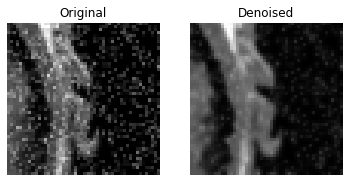

In [13]:
image_in='impulsive_output_gs.png'
img_in = mpimg.imread(image_in)
image=img_in[100:150, 150:200,0] 
pad_width=1
h=0.25
D_0=1
alpha=2
denoised_image_2=HRL.NL_Means_CPP(image, pad_width,h,D_0,alpha)

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [05:27<00:00,  6.55s/it]


Process ended succesfully.


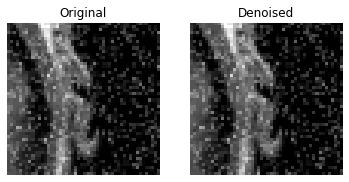

In [14]:
pad_width=1
h=0.25
D_0= 0.025
alpha= 10
denoised_image_2=HRL.NL_Means_CPP(image, pad_width,h,D_0,alpha)

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [05:22<00:00,  6.46s/it]


Process ended succesfully.


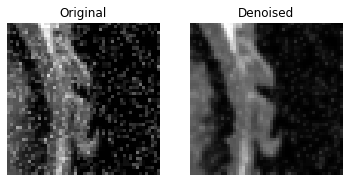

In [15]:
pad_width=1
h=0.25
D_0=10
alpha= 10
denoised_image_2=HRL.NL_Means_CPP(image, pad_width,h,D_0,alpha)

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [05:53<00:00,  7.07s/it]


Process ended succesfully.


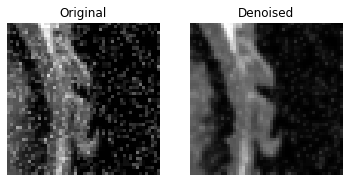

In [16]:
pad_width=1
h=0.25
D_0=1
alpha= 10
denoised_image_2=HRL.NL_Means_CPP(image, pad_width,h,D_0,alpha)

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [18:34<00:00, 22.29s/it]

Process ended succesfully.


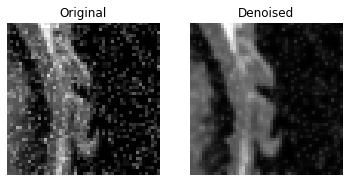

In [17]:
pad_width=1
h=0.25
D_0= 1
alpha= 0.5
denoised_image_2=HRL.NL_Means_CPP(image, pad_width,h,D_0,alpha)

Re-defining pixel # 49 in image. Please, wait: 100%|██████████| 50/50 [04:50<00:00,  5.81s/it]


Process ended succesfully.


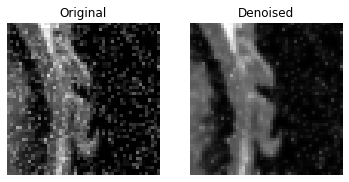

In [18]:
pad_width=1
h=0.25
D_0= 0.25
alpha= 10
denoised_image_2=HRL.NL_Means_CPP(image, pad_width,h,D_0,alpha)

Finally, after mantaining the same value from the parameter h of NLM, we can see a trade-off between reducing noise and mantaining small characteristics of the image thanks to the values of $ D_0 = 0.25 $ and $ \alpha = 10$. 

This algorithm would work properly in MS because it would mantain the brigth details characteristic of the image of the lesion.